## Setting

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Ìå®ÌÇ§ÏßÄ ÏóÖÍ∑∏Î†àÏù¥ÎìúÎ°ú Ïù∏Ìïú ÏóêÎü¨ Ï≤òÎ¶¨Î•º ÏúÑÌï¥ ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†Ñ Downgrade
!pip install 'networkx<2.7'

# Îü∞ÌÉÄÏûÑ Ïû¨ÏãúÏûë !

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
!sudo apt-get install g++ openjdk-7-jdk # Install Java 1.7+
# !sudo apt-get install python-dev; pip install konlpy     # Python 2.x
!sudo apt-get install python3-dev; pip3 install konlpy   # Python 3.x
!sudo apt-get install curl
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
%pip install mecab-python3

In [ ]:
!pip install --upgrade gensim==3.8

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

## Load Data

In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/KDT/project/news_project/data/df1_clustered.csv', index_col=0)

from ast import literal_eval
df1['pos'] = df1['pos'].apply(lambda x: literal_eval(x))
df1['Noun'] = df1['Noun'].apply(lambda x: literal_eval(x))
df1['verb'] = df1['verb'].apply(lambda x: literal_eval(x))
df1['adverb'] = df1['adverb'].apply(lambda x: literal_eval(x))
df1['adjective'] = df1['adjective'].apply(lambda x: literal_eval(x))
df1['token_important'] = df1['token_important'].map(literal_eval)

In [ ]:
cluster_result = {}

## ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º Ï†ïÎ¶¨

In [ ]:
cluster_labels = list(df1['cluster_label'].value_counts().index)
cluster_labels.remove(-1)
cluster_labels = sorted(cluster_labels)

In [ ]:
cluster_labels

[0, 1, 2, 3]

In [ ]:
from collections import Counter
from gensim.summarization.summarizer import summarize
stopword = ['ÏùÄ', 'Îäî', 'Ïù¥', 'Í∞Ä', 'Îì±', 'Í≥†', 'ÏôÄ', 'Ìï¥', 'Îêú']

for label in cluster_labels:
    cluster_data = df1[df1['cluster_label']==label]
    cluster_tokens = [token for tokens in cluster_data['token_important'].to_list() for token in tokens]
    token_count_dict = Counter(cluster_tokens)
    token_top_20 = dict([token for token in token_count_dict.most_common() if not token[0] in stopword][:20])
    cluster_result[label] = {'keyword' : token_top_20}

    cluster_contents = ' '.join(cluster_data['content'].to_list())
    summarize_result = summarize(cluster_contents, ratio=0.05)
    
    while True:
        summarize_result = summarize(summarize_result, ratio=0.1)
        if len(summarize_result.split('\n')) <= 10:
            break
    
    summarize_result = list(set(summarize_result.split('\n')))
    cluster_result[label].update({'summarization' : summarize_result})

    print('cluster ' +  str(label))
    print(token_top_20)
    print(summarize_result)

cluster 0
{'AI': 4312, 'GPT': 2756, 'Ï±ó': 2475, 'Íµ¨Í∏Ä': 1488, 'Í≤ÄÏÉâ': 1371, 'ÏÑúÎπÑÏä§': 986, 'Í∏∞Ïà†': 900, 'ÏßÄÎä•': 863, 'Ïù∏Í≥µ': 821, 'MS': 770, 'Ïò§Ìîà': 761, 'Î™®Îç∏': 683, 'Ï±óÎ¥á': 678, 'Í∏∞ÏóÖ': 611, 'ÎåÄÌôî': 610, 'Í∞úÎ∞ú': 589, 'Ï†ïÎ≥¥': 549, 'Îç∞Ïù¥ÌÑ∞': 538, 'Í≥µÍ∞ú': 531, 'ÏÉù': 518}
['ÏàúÎã§ ÌîºÏ∞®Ïù¥ Íµ¨Í∏Ä Î∞è ÏïåÌååÎ≤≥ ÏµúÍ≥†Í≤ΩÏòÅÏûê CEOÎäî 6Ïùº ÌòÑÏßÄÏãúÍ∞Ñ Í≥µÏãù Î∏îÎ°úÍ∑∏Î•º ÌÜµÌï¥ "Íµ¨Í∏ÄÏùÄ Î∞îÎìú BardÎùºÍ≥† ÌïòÎäî ÎûåÎã§ LaMDA Í∏∞Î∞òÏùò Ïã§ÌóòÏ†ÅÏù∏ ÎåÄÌôîÌòï AI ÏÑúÎπÑÏä§Î•º Í∞úÎ∞úÌï¥ ÏôîÎã§"Î©∞ "Ïã†Î¢∞Ìï† Ïàò ÏûàÎäî ÌÖåÏä§ÌÑ∞ÏóêÍ≤å Î∞îÎìúÎ•º Í≥µÍ∞úÌï®ÏúºÎ°úÏç® Ìïú Í±∏Ïùå Îçî ÎÇòÏïÑÍ∞ÄÍ≥† ÏûàÏúºÎ©∞, ÏùºÎ∞ò Ïù¥Ïö©ÏûêÏóêÍ≤åÎäî ÏïûÏúºÎ°ú Î™á Ï£º ÏïàÏóê Îçî Í¥ëÎ≤îÏúÑÌïòÍ≤å Ï†úÍ≥µÌï† ÏòàÏ†ï"Ïù¥ÎùºÍ≥† Î∞ùÌòîÎã§.', 'Íµ¨Í∏Ä Î™®ÌöåÏÇ¨ ÏïåÌååÎ≤≥Ïùò ÏàúÎã§Î•¥ ÌîºÏ∞®Ïù¥ ÏµúÍ≥†Í≤ΩÏòÅÏûê CEOÎäî 6Ïùº(ÌòÑÏßÄ ÏãúÍ∞Ñ) ÏûêÏÇ¨Ïùò Î∏îÎ°úÍ∑∏Î•º ÌÜµÌï¥ "Íµ¨Í∏ÄÏùÄ Î∞îÎìúÎùºÍ≥† ÌïòÎäî ÎûåÎã§ LaMDA Í∏∞Î∞òÏùò Ïã§ÌóòÏ†ÅÏù∏ ÎåÄÌôîÌòï AI ÏÑúÎπÑÏä§Î•º Í∞úÎ∞úÌï¥ ÏôîÍ≥†, Ïò§Îäò Ïã†Î¢∞Ìï†

In [ ]:
cluster_result

{0: {'keyword': {'AI': 4312,
   'GPT': 2756,
   'Ï±ó': 2475,
   'Íµ¨Í∏Ä': 1488,
   'Í≤ÄÏÉâ': 1371,
   'ÏÑúÎπÑÏä§': 986,
   'Í∏∞Ïà†': 900,
   'ÏßÄÎä•': 863,
   'Ïù∏Í≥µ': 821,
   'MS': 770,
   'Ïò§Ìîà': 761,
   'Î™®Îç∏': 683,
   'Ï±óÎ¥á': 678,
   'Í∏∞ÏóÖ': 611,
   'ÎåÄÌôî': 610,
   'Í∞úÎ∞ú': 589,
   'Ï†ïÎ≥¥': 549,
   'Îç∞Ïù¥ÌÑ∞': 538,
   'Í≥µÍ∞ú': 531,
   'ÏÉù': 518},
  'summarization': ['ÏàúÎã§ ÌîºÏ∞®Ïù¥ Íµ¨Í∏Ä Î∞è ÏïåÌååÎ≤≥ ÏµúÍ≥†Í≤ΩÏòÅÏûê CEOÎäî 6Ïùº ÌòÑÏßÄÏãúÍ∞Ñ Í≥µÏãù Î∏îÎ°úÍ∑∏Î•º ÌÜµÌï¥ "Íµ¨Í∏ÄÏùÄ Î∞îÎìú BardÎùºÍ≥† ÌïòÎäî ÎûåÎã§ LaMDA Í∏∞Î∞òÏùò Ïã§ÌóòÏ†ÅÏù∏ ÎåÄÌôîÌòï AI ÏÑúÎπÑÏä§Î•º Í∞úÎ∞úÌï¥ ÏôîÎã§"Î©∞ "Ïã†Î¢∞Ìï† Ïàò ÏûàÎäî ÌÖåÏä§ÌÑ∞ÏóêÍ≤å Î∞îÎìúÎ•º Í≥µÍ∞úÌï®ÏúºÎ°úÏç® Ìïú Í±∏Ïùå Îçî ÎÇòÏïÑÍ∞ÄÍ≥† ÏûàÏúºÎ©∞, ÏùºÎ∞ò Ïù¥Ïö©ÏûêÏóêÍ≤åÎäî ÏïûÏúºÎ°ú Î™á Ï£º ÏïàÏóê Îçî Í¥ëÎ≤îÏúÑÌïòÍ≤å Ï†úÍ≥µÌï† ÏòàÏ†ï"Ïù¥ÎùºÍ≥† Î∞ùÌòîÎã§.',
   'Íµ¨Í∏Ä Î™®ÌöåÏÇ¨ ÏïåÌååÎ≤≥Ïùò ÏàúÎã§Î•¥ ÌîºÏ∞®Ïù¥ ÏµúÍ≥†Í≤ΩÏòÅÏûê CEOÎäî 6Ïùº(ÌòÑÏßÄ ÏãúÍ∞Ñ) ÏûêÏÇ¨Ïùò Î∏îÎ°úÍ∑∏Î•º ÌÜµÌï¥ "Íµ¨Í∏ÄÏùÄ Î∞îÎìúÎùºÍ≥† ÌïòÎäî ÎûåÎã§ LaM

## ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

In [ ]:
def make_wordcloud(result_dict):
    for result in result_dict:
        wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                              background_color='white',
                              max_font_size=70,
                              colormap='Blues').generate_from_frequencies(result_dict[result]['keyword'])
        plt.figure(figsize=(6, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
        plt.savefig(f'cluster{result}.png')

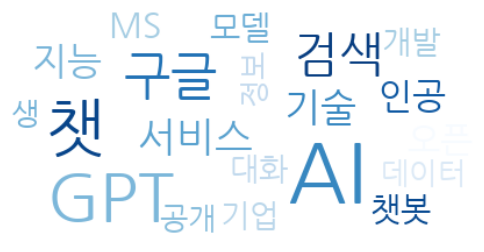

<Figure size 640x480 with 0 Axes>

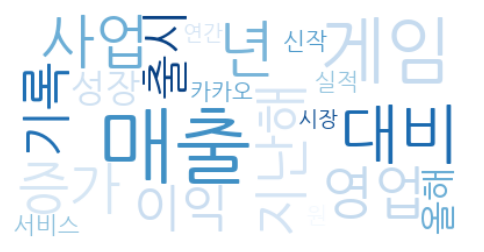

<Figure size 640x480 with 0 Axes>

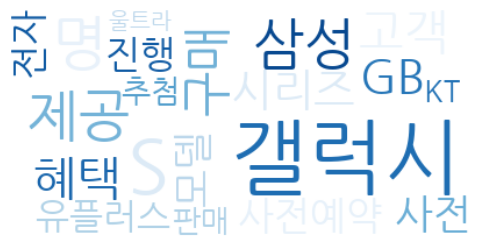

<Figure size 640x480 with 0 Axes>

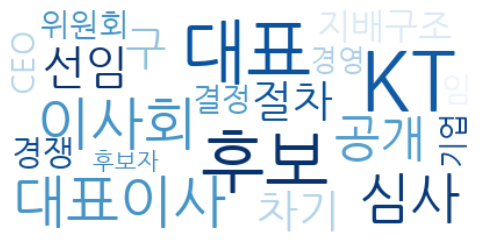

<Figure size 640x480 with 0 Axes>

In [ ]:
make_wordcloud(cluster_result)

## Îâ¥Ïä§Î†àÌÑ∞ ÌÖçÏä§Ìä∏ Ìè¨Îß∑

In [ ]:
self.text = ''

def write_text(self):
    
    title = f'''

    üíå {self.year}ÎÖÑ {self.month}Ïõî {self.week}Ï£ºÏ∞® Îâ¥Ïä§ ÏöîÏïΩ üíå

    '''

    self.text += intro

    for label in self.cluster_result:

        keyword = ' '.join(self.cluster_result[label]['keyword'])
        summarization = '\n    '.join(self.cluster_result[label]['summarization'])

        content = f'''

        ‚úÖ Ï£ºÏöî ÌÇ§ÏõåÎìú {label + 1} : {keyword}

        ‚û°Ô∏è ÎÇ¥Ïö© ÏöîÏïΩ
        
        {summarization}

        '''
        self.text += content
    
    return self.text

In [ ]:
text = ''

In [ ]:
text = ''

year = '2023'
month = '2'
week = '1'

intro = f'''

üíå {year}ÎÖÑ {month}Ïõî {week}Ï£ºÏ∞® Îâ¥Ïä§ ÏöîÏïΩ üíå

'''

text += title

In [ ]:
for label in cluster_result:

    keyword = ' '.join(cluster_result[label]['keyword'])
    summarization = '\n    '.join(cluster_result[label]['summarization'])

    content = f'''

    ‚úÖ Ï£ºÏöî ÌÇ§ÏõåÎìú {label + 1} : {keyword}

    ‚û°Ô∏è ÎÇ¥Ïö© ÏöîÏïΩ
    
    {summarization}

    '''
    text += content

In [ ]:
print(text)



üíå 2023ÎÖÑ 2Ïõî 1Ï£ºÏ∞® Îâ¥Ïä§ ÏöîÏïΩ üíå



    ‚úÖ Ï£ºÏöî ÌÇ§ÏõåÎìú 1 : AI GPT Ï±ó Íµ¨Í∏Ä Í≤ÄÏÉâ ÏÑúÎπÑÏä§ Í∏∞Ïà† ÏßÄÎä• Ïù∏Í≥µ MS Ïò§Ìîà Î™®Îç∏ Ï±óÎ¥á Í∏∞ÏóÖ ÎåÄÌôî Í∞úÎ∞ú Ï†ïÎ≥¥ Îç∞Ïù¥ÌÑ∞ Í≥µÍ∞ú ÏÉù

    ‚û°Ô∏è ÎÇ¥Ïö© ÏöîÏïΩ
    
    ÏàúÎã§ ÌîºÏ∞®Ïù¥ Íµ¨Í∏Ä Î∞è ÏïåÌååÎ≤≥ ÏµúÍ≥†Í≤ΩÏòÅÏûê CEOÎäî 6Ïùº ÌòÑÏßÄÏãúÍ∞Ñ Í≥µÏãù Î∏îÎ°úÍ∑∏Î•º ÌÜµÌï¥ "Íµ¨Í∏ÄÏùÄ Î∞îÎìú BardÎùºÍ≥† ÌïòÎäî ÎûåÎã§ LaMDA Í∏∞Î∞òÏùò Ïã§ÌóòÏ†ÅÏù∏ ÎåÄÌôîÌòï AI ÏÑúÎπÑÏä§Î•º Í∞úÎ∞úÌï¥ ÏôîÎã§"Î©∞ "Ïã†Î¢∞Ìï† Ïàò ÏûàÎäî ÌÖåÏä§ÌÑ∞ÏóêÍ≤å Î∞îÎìúÎ•º Í≥µÍ∞úÌï®ÏúºÎ°úÏç® Ìïú Í±∏Ïùå Îçî ÎÇòÏïÑÍ∞ÄÍ≥† ÏûàÏúºÎ©∞, ÏùºÎ∞ò Ïù¥Ïö©ÏûêÏóêÍ≤åÎäî ÏïûÏúºÎ°ú Î™á Ï£º ÏïàÏóê Îçî Í¥ëÎ≤îÏúÑÌïòÍ≤å Ï†úÍ≥µÌï† ÏòàÏ†ï"Ïù¥ÎùºÍ≥† Î∞ùÌòîÎã§.
    Íµ¨Í∏Ä Î™®ÌöåÏÇ¨ ÏïåÌååÎ≤≥Ïùò ÏàúÎã§Î•¥ ÌîºÏ∞®Ïù¥ ÏµúÍ≥†Í≤ΩÏòÅÏûê CEOÎäî 6Ïùº(ÌòÑÏßÄ ÏãúÍ∞Ñ) ÏûêÏÇ¨Ïùò Î∏îÎ°úÍ∑∏Î•º ÌÜµÌï¥ "Íµ¨Í∏ÄÏùÄ Î∞îÎìúÎùºÍ≥† ÌïòÎäî ÎûåÎã§ LaMDA Í∏∞Î∞òÏùò Ïã§ÌóòÏ†ÅÏù∏ ÎåÄÌôîÌòï AI ÏÑúÎπÑÏä§Î•º Í∞úÎ∞úÌï¥ ÏôîÍ≥†, Ïò§Îäò Ïã†Î¢∞Ìï† Ïàò ÏûàÎäî ÌÖåÏä§ÌÑ∞ÏóêÍ≤å Î∞îÎìúÎ•º Í≥µÍ∞úÌïòÍ∏∞Î°ú ÌñàÎã§"Î©